In [1]:
# load the required liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [2]:
# to surpress warning
from warnings import filterwarnings 
filterwarnings('ignore')

# display all column of dataframe
pd.options.display.max_columns = None 

# display all row of dataframe
pd.options.display.max_rows = None

# plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# load the data
df_BOB = pd.read_excel("statement.xlsx")
df_BOB.head()

,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance
0,1,2024-07-11,A49516,BY CASH,0,10000.0,19066.08
1,2,2024-07-10,S36503509,UPIAR/419216112836/DR/Soni Jiy/NA/soni8373@pay...,500,0.0,9066.08
2,3,2024-07-10,S32577276,UPIAR/419214093193/DR/Allianc/NA/alliance.payu@h/,5000,0.0,9566.08
3,4,2024-07-10,S31553714,UPIAR/419214269027/DR/ Allianc/NA/alliance.pay...,20000,0.0,14566.08
4,5,2024-07-10,S31389355,UPIAR/419214181305/DR/Soni Jiy/NA/soni8373@pay...,1,0.0,34566.08


In [4]:
df_BOB.fillna(0,inplace=True)

In [5]:
df_BOB.head()

,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance
0,1,2024-07-11 00:00:00,A49516,BY CASH,0,10000.0,19066.08
1,2,2024-07-10 00:00:00,S36503509,UPIAR/419216112836/DR/Soni Jiy/NA/soni8373@pay...,500,0.0,9066.08
2,3,2024-07-10 00:00:00,S32577276,UPIAR/419214093193/DR/Allianc/NA/alliance.payu@h/,5000,0.0,9566.08
3,4,2024-07-10 00:00:00,S31553714,UPIAR/419214269027/DR/ Allianc/NA/alliance.pay...,20000,0.0,14566.08
4,5,2024-07-10 00:00:00,S31389355,UPIAR/419214181305/DR/Soni Jiy/NA/soni8373@pay...,1,0.0,34566.08


In [6]:
df_BOB['Withdrwal Amount'].fillna(0, inplace=True)
df_BOB.head()

,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance
0,1,2024-07-11 00:00:00,A49516,BY CASH,0,10000.0,19066.08
1,2,2024-07-10 00:00:00,S36503509,UPIAR/419216112836/DR/Soni Jiy/NA/soni8373@pay...,500,0.0,9066.08
2,3,2024-07-10 00:00:00,S32577276,UPIAR/419214093193/DR/Allianc/NA/alliance.payu@h/,5000,0.0,9566.08
3,4,2024-07-10 00:00:00,S31553714,UPIAR/419214269027/DR/ Allianc/NA/alliance.pay...,20000,0.0,14566.08
4,5,2024-07-10 00:00:00,S31389355,UPIAR/419214181305/DR/Soni Jiy/NA/soni8373@pay...,1,0.0,34566.08


In [7]:
import pandas as pd

# Convert 'Withdrwal Amount' to numeric, forcing errors to NaN
df_BOB['Withdrwal Amount'] = pd.to_numeric(df_BOB['Withdrwal Amount'], errors='coerce')

# Calculate total income and expenses
total_income = df_BOB['Deposit Amount'].sum()
total_expenses = df_BOB['Withdrwal Amount'].sum()

# Print the results
print(f"Total Income: {total_income}")
print(f"Total Expenses: {total_expenses}")


Total Income: 541181.28
Total Expenses: 327476.32


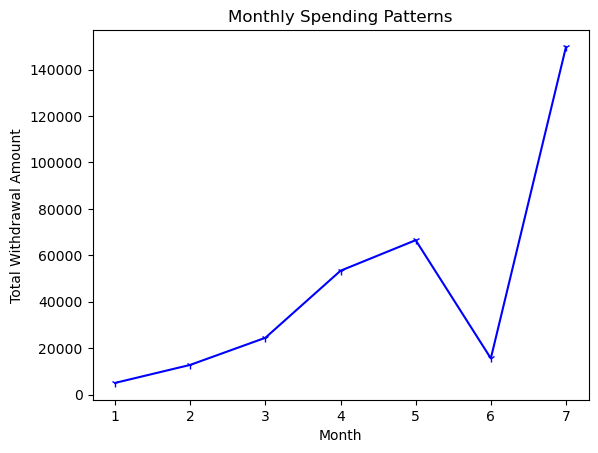

In [8]:
# monthly spending patterns

import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df_BOB['Date'] = pd.to_datetime(df_BOB['Date'], errors='coerce')

# Convert 'Withdrwal Amount' to numeric, forcing errors to NaN
df_BOB['Withdrwal Amount'] = pd.to_numeric(df_BOB['Withdrwal Amount'], errors='coerce')

# Group by month and sum the 'Withdrwal Amount'
monthly_expenses = df_BOB.groupby(df_BOB['Date'].dt.month)['Withdrwal Amount'].sum()

# Plot the monthly expenses
monthly_expenses.plot(color="Blue", marker="1")
plt.xlabel('Month')
plt.ylabel('Total Withdrawal Amount')
plt.title('Monthly Spending Patterns')
plt.show()

In [9]:
# major expenses
top_expenses = df_BOB.nlargest(5,'Withdrwal Amount')
top_expenses

,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance
22,23,2024-07-06,S79667058,UPIAW419114475476/DR/ Allianc/NA/a11iance.payu@h/,100000.0,0.0,34655.58
53,54,2024-05-23,S35869262,Dept INA /9898240090@indi/,50000.0,0.0,13017.4
67,68,2024-04-28,S73714069,UPIAW413413195574/DR/Soni Jiy/NA/soni8373@paytm,25000.0,0.0,14651.4
3,4,2024-07-10,S31553714,UPIAR/419214269027/DR/ Allianc/NA/alliance.pay...,20000.0,0.0,14566.08
12,13,2024-07-10,S19704183,UPIAR/419210213062/DR/Allianc/NA/alliance.payu@h/,20000.0,0.0,14567.08


In [10]:
# major income
top_income = df_BOB.nlargest(5,'Deposit Amount')
top_income

,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance
14,15,2024-07-09,A661235,BY CASH,0.0,125000.0,134655.58
23,24,2024-07-05,A661235,BY CASH,0.0,125000.0,134655.58
54,55,2024-05-23,A655833,BY CASH,0.0,45000.0,63017.4
68,69,2024-04-28,A407051,BY CASH,0.0,30000.0,39651.4
11,12,2024-07-10,S19713690,UPIAR/419210213062/REV/TEST/NA/NA/UPIIntent,0.0,20000.0,34567.08


In [11]:
df_BOB.dtypes

s.no                        object
Date                datetime64[ns]
Transaction Id              object
Remarks                     object
Withdrwal Amount           float64
Deposit Amount             float64
closing Balance             object
dtype: object

In [12]:
df_BOB['closing Balance']=pd.to_numeric(df_BOB['closing Balance'],errors='coerce').astype(float)
df_BOB.dtypes

s.no                        object
Date                datetime64[ns]
Transaction Id              object
Remarks                     object
Withdrwal Amount           float64
Deposit Amount             float64
closing Balance            float64
dtype: object

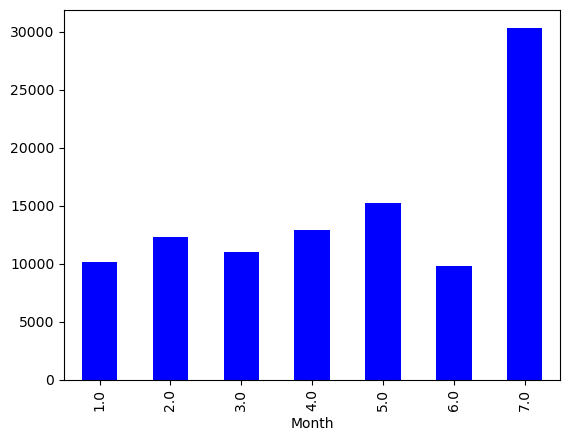

In [13]:
# Average monthly balance
df_BOB['Month'] = df_BOB['Date'].dt.month
average_monthly_balance = df_BOB.groupby('Month')['closing Balance'].mean()
average_monthly_balance.plot(kind='bar',color='Blue')
plt.show()

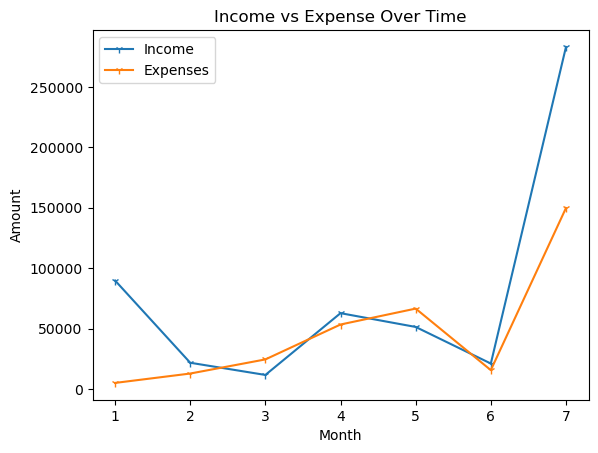

In [14]:
monthly_income=df_BOB.groupby('Month')['Deposit Amount'].sum()
monthly_expenses=df_BOB.groupby('Month')['Withdrwal Amount'].sum()

plt.plot(monthly_income.index,monthly_income , label='Income',marker='1')
plt.plot(monthly_expenses.index,monthly_expenses , label='Expenses',marker='1')

plt.xlabel('Month')
plt.ylabel('Amount')

plt.title('Income vs Expense Over Time')
plt.legend()
plt.show()

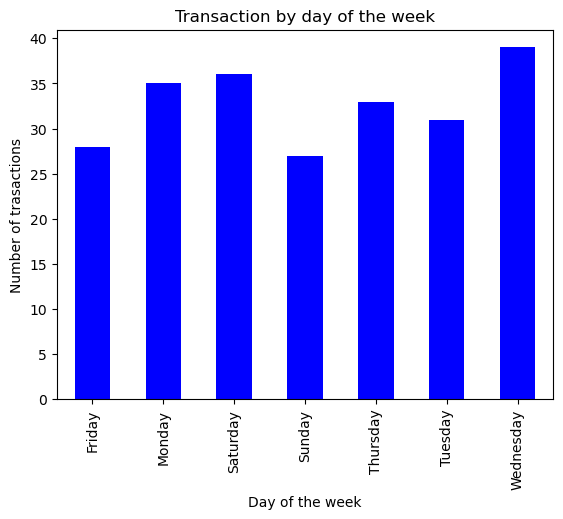

In [15]:
# Day of the week Analytics

df_BOB['Day_of_Week']=df_BOB['Date'].dt.day_name()
transactions_by_day=df_BOB.groupby('Day_of_Week').size()

transactions_by_day.plot(kind='bar',color='Blue')
plt.xlabel('Day of the week')
plt.ylabel('Number of trasactions')
plt.title('Transaction by day of the week')
plt.show()

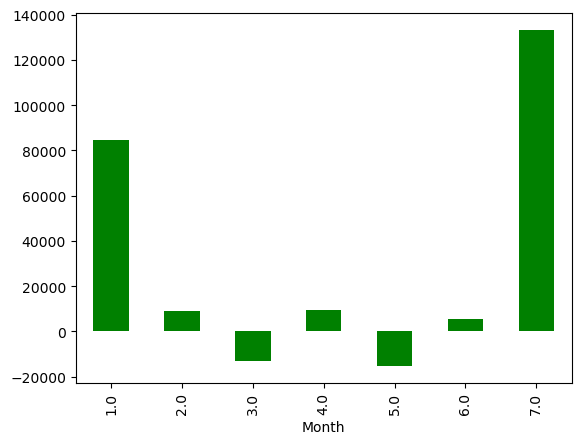

In [16]:
# Net Cash Flow
# calculate the net cashflow each month

df_BOB['Net_cashflow'] = df_BOB['Deposit Amount']-df_BOB['Withdrwal Amount']
monthly_cashflow =df_BOB.groupby('Month')['Net_cashflow'].sum()
monthly_cashflow.plot(kind='bar',color='Green')
plt.show()

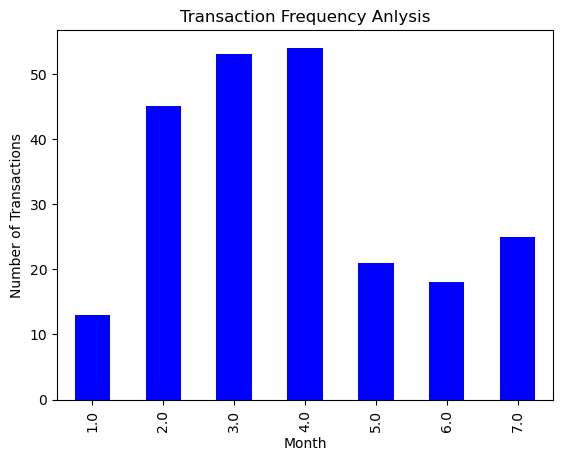

In [17]:
# Transaction Frequency Anlysis

Tra_fre = df_BOB.groupby('Month').size()
Tra_fre.plot(kind='bar',color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency Anlysis')
plt.show()

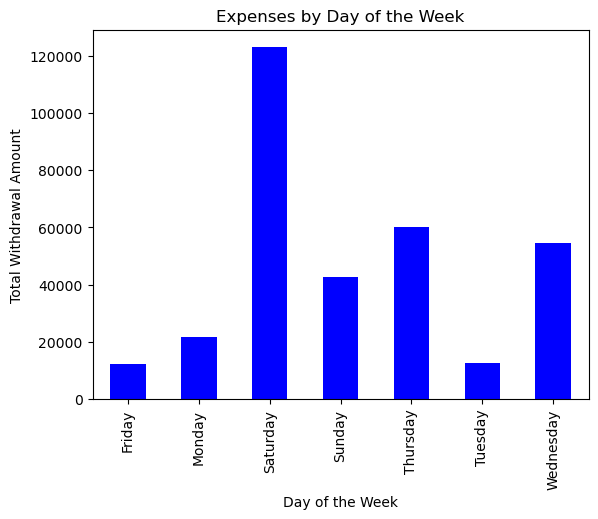

In [18]:
# Assuming withdrawals is a subset of df_BOB where 'Withdrwal Amount' > 0
withdrawals = df_BOB[df_BOB['Withdrwal Amount'] > 0]

withdrawals['Date'] = pd.to_datetime(withdrawals['Date'])

withdrawals['Day_of_week'] = withdrawals['Date'].dt.day_name()
expenses_by_day_of_week = withdrawals.groupby('Day_of_week')['Withdrwal Amount'].sum()

# Plot the expenses by day of the week
expenses_by_day_of_week.plot(kind='bar', color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Withdrawal Amount')
plt.title('Expenses by Day of the Week')
plt.show()

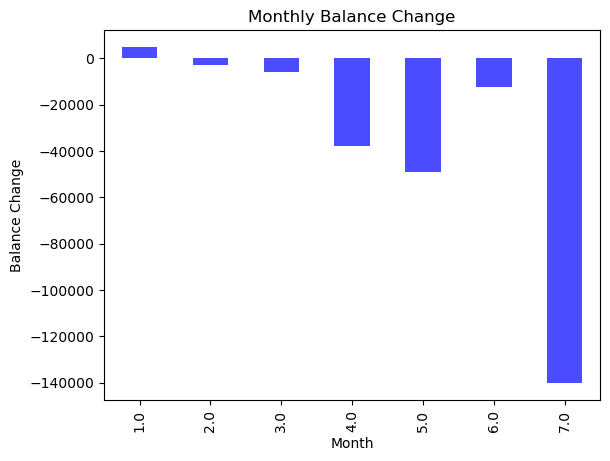

In [19]:
# monthly balance change 
# plot the change to your account over the months to see how its fluctuates

monthly_last_balance = df_BOB.groupby('Month')['closing Balance'].last()
monthly_withdrawals = df_BOB.groupby('Month')['Withdrwal Amount'].sum()
monthly_balance_change = monthly_last_balance - monthly_withdrawals

# Plot the monthly balance change
monthly_balance_change.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Balance Change')
plt.title('Monthly Balance Change')
plt.show()

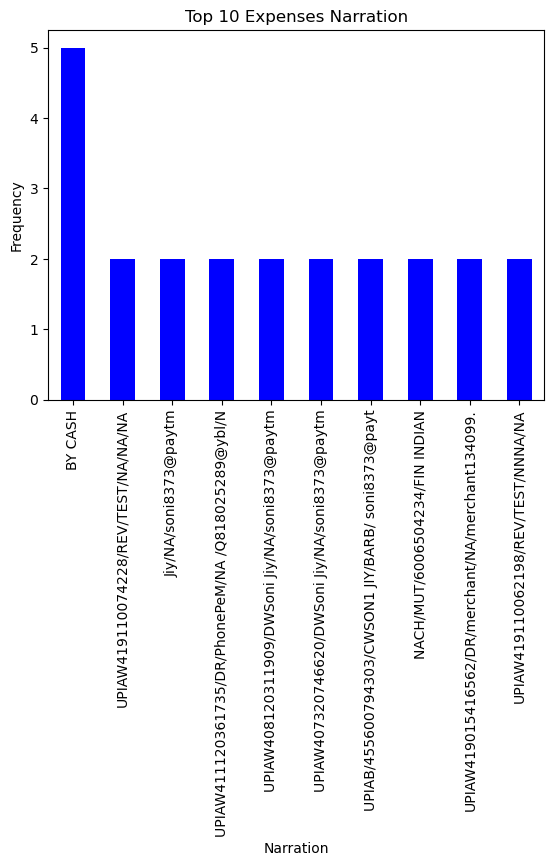

In [20]:
# Expense distribution by narration(based on discription column)

top_narration = df_BOB['Remarks'].value_counts().nlargest(10)
top_narration.plot(kind='bar',color='blue')
plt.xlabel('Narration')
plt.ylabel('Frequency')
plt.title('Top 10 Expenses Narration')
plt.show()

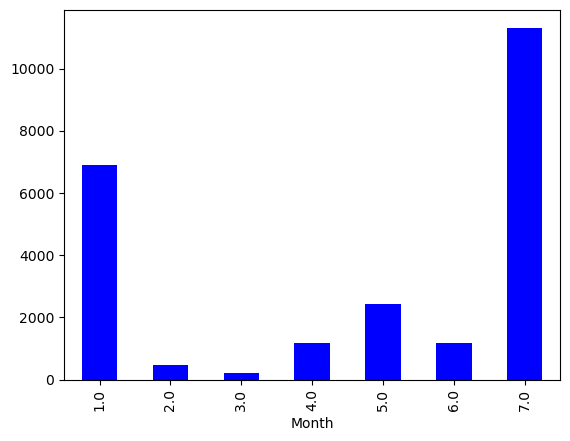

In [21]:
# average withdrawl and deposite amount for each month

avg_withdrwal_per_month = df_BOB.groupby('Month')['Withdrwal Amount'].mean()
avg_deposit_per_month =df_BOB.groupby('Month')['Deposit Amount'].mean()
avg_deposit_per_month.plot(kind='bar',color='blue')
plt.show()

<AxesSubplot:xlabel='Month'>

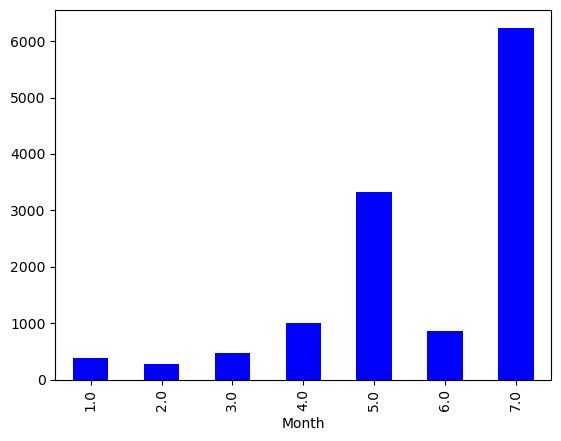

In [22]:
avg_withdrwal_per_month.plot(kind='bar',color='blue')

In [23]:
from pandas.core.reshape.pivot import pivot_table

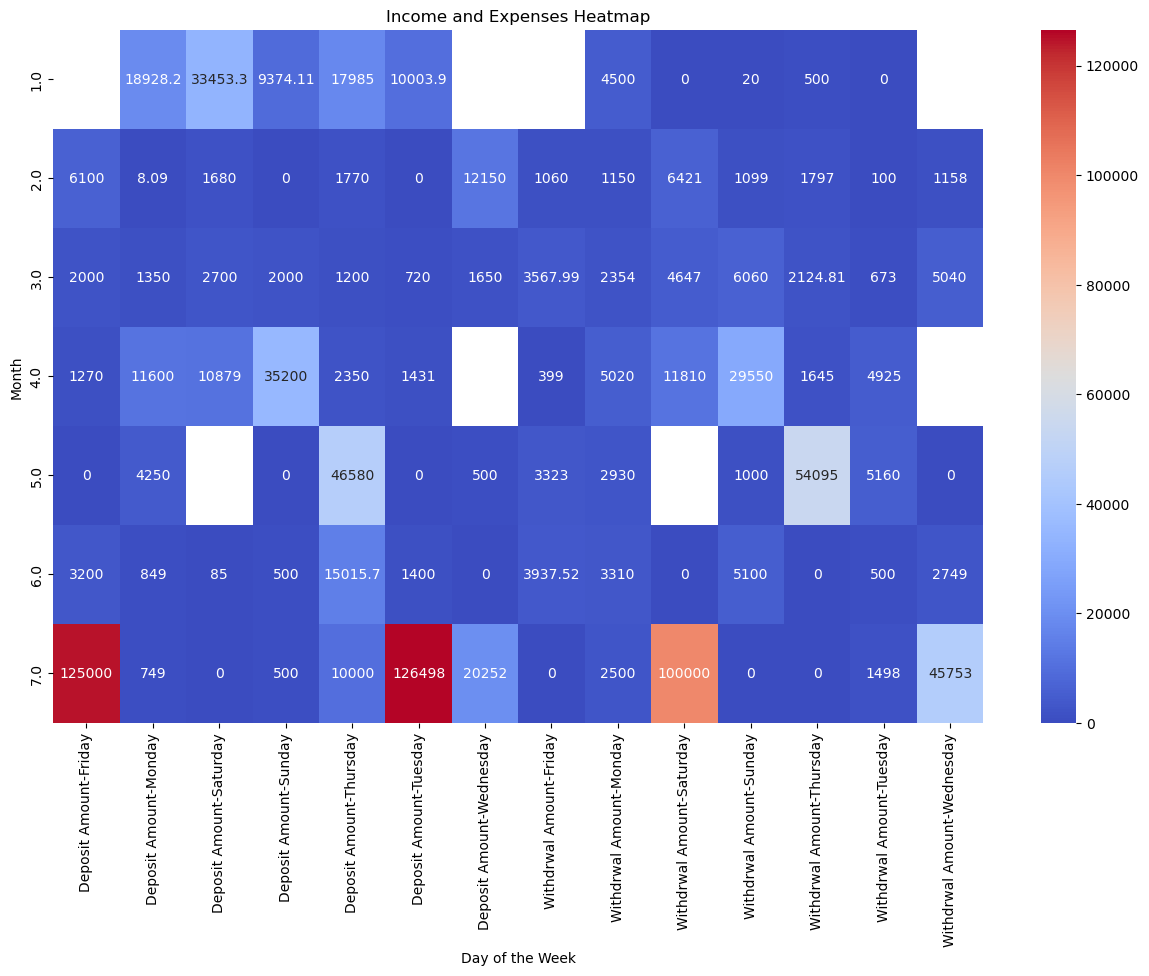

In [24]:
# income and expense Heatmap:
df_BOB['Day_of_week'] = df_BOB['Date'].dt.day_name()

# Create a pivot table to aggregate income and expenses by month and day of the week
income_expenses_heatmap = df_BOB.pivot_table(index='Month', columns='Day_of_week', values=['Deposit Amount', 'Withdrwal Amount'], aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(income_expenses_heatmap, cmap='coolwarm', annot=True, fmt='g')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Income and Expenses Heatmap')
plt.show()

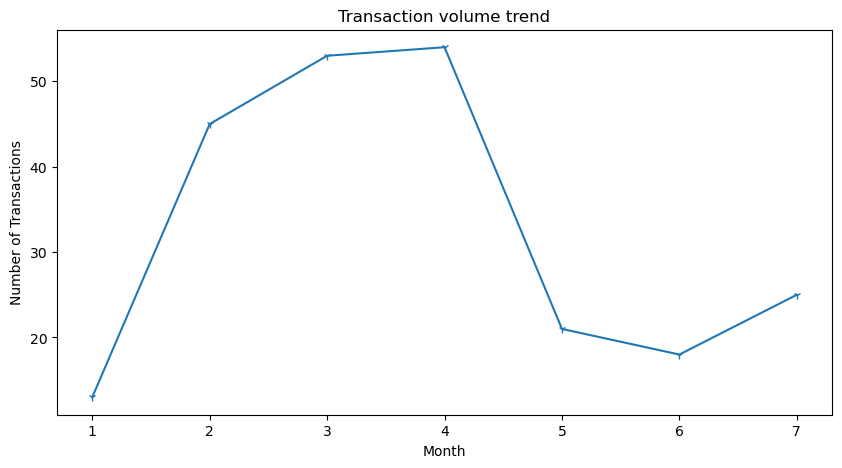

In [25]:
# Transaction volume trend:
# visulaize the trend of the number of transaction over the months.

monthly_transaction_count = df_BOB.groupby('Month').size()
plt.figure(figsize=(10,5))

monthly_transaction_count.plot(kind='line',marker='1')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction volume trend')
plt.show()

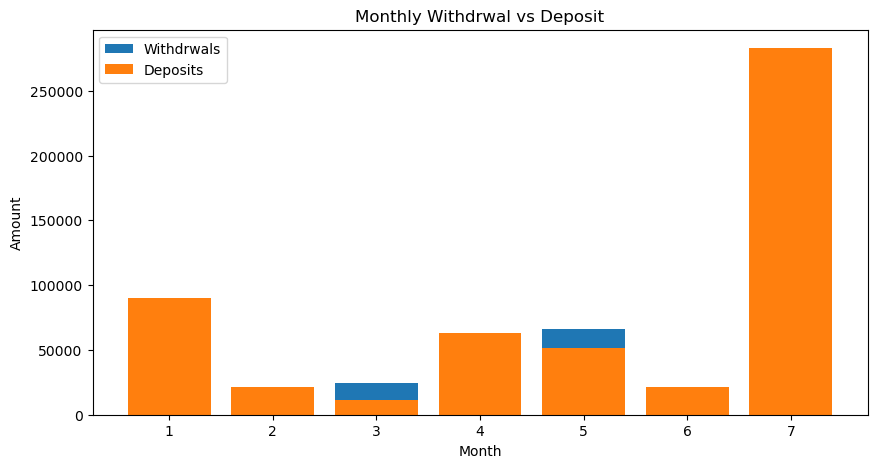

In [26]:
# monthly withdrwal vs Deposite comparison 

monthly_withdrwals = df_BOB.groupby('Month')['Withdrwal Amount'].sum()
monthly_deposits=df_BOB.groupby('Month')['Deposit Amount'].sum()

plt.figure(figsize=(10,5))
plt.bar(monthly_withdrwals.index, monthly_withdrwals,label='Withdrwals')
plt.bar(monthly_deposits.index, monthly_deposits,label='Deposits')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Withdrwal vs Deposit')
plt.legend()
plt.show()

In [27]:
bank_statement_df =df_BOB

Average Daily Expenses:
Month
1.0      557.777778
2.0      608.809524
3.0     1112.127273
4.0     2319.521739
5.0     5116.000000
6.0     1199.732308
7.0    18718.875000
Name: Withdrwal Amount, dtype: float64


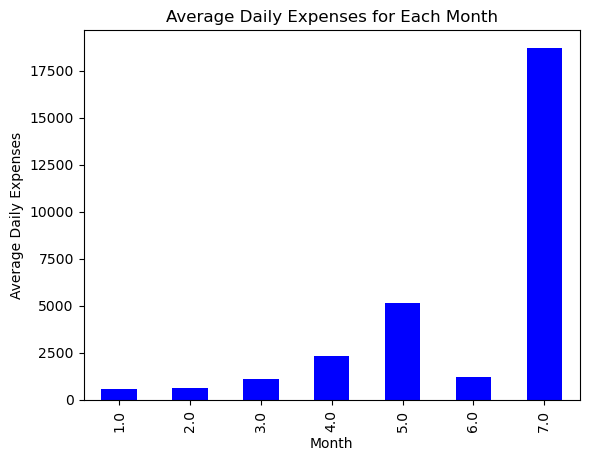

In [28]:
# Average Daily expense for each month 
# Calculate daily expenses
bank_statement_df['Date'] = pd.to_datetime(bank_statement_df['Date'])

# Create a 'Day' column from the 'Date' column
bank_statement_df['Day'] = bank_statement_df['Date'].dt.day

Daily_expenses = bank_statement_df.groupby(['Month', 'Day'])['Withdrwal Amount'].sum().reset_index()

# Calculate average daily expenses for each month
average_daily_expenses = Daily_expenses.groupby('Month')['Withdrwal Amount'].mean()

# Print average daily expenses
print('Average Daily Expenses:')
print(average_daily_expenses)

# Plotting average daily expenses as a bar plot
average_daily_expenses.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Daily Expenses')
plt.title('Average Daily Expenses for Each Month')
plt.show()

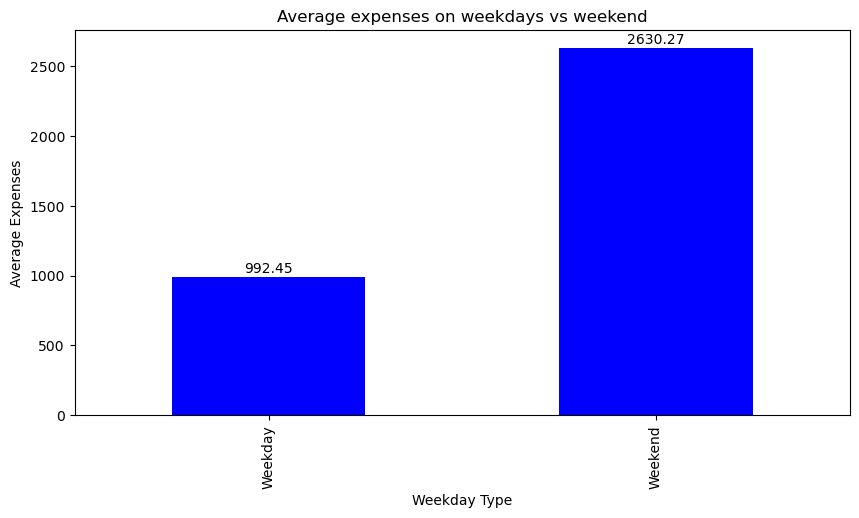

In [29]:
# Weekday vs weekend expenses:
def categorize_weekday(weekday):
    if weekday in['Saturday','Sunday']:
        return 'Weekend'
    return 'Weekday'

plt.figure(figsize=(10,5))
bank_statement_df['Weekday_Type']=bank_statement_df['Day_of_week'].apply(categorize_weekday)
expenses_by_weekday_type = bank_statement_df.groupby('Weekday_Type')['Withdrwal Amount'].mean()
expenses_by_weekday_type.plot(kind='bar',color='blue')
plt.xlabel('Weekday Type')
plt.ylabel('Average Expenses')
plt.title('Average expenses on weekdays vs weekend')

# Adding values on top of the bars
for i, value in enumerate(expenses_by_weekday_type):
    plt.text(i, value + 10, str(round(value, 2)), ha='center', va='bottom', fontsize=10)
    
plt.show()

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


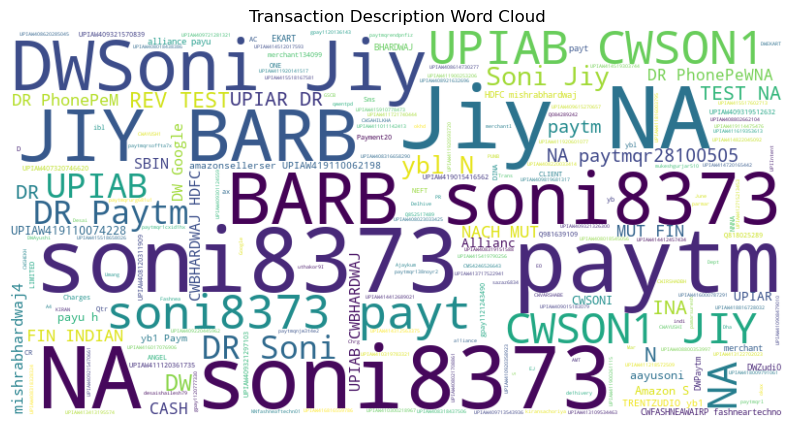

In [31]:
# transaction description wordcloud
# create a word cloud to visualize the most frequent words in transaction description 
from wordcloud import WordCloud

narration_words = ' '.join(bank_statement_df['Remarks'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(narration_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Transaction Description Word Cloud')
plt.show()

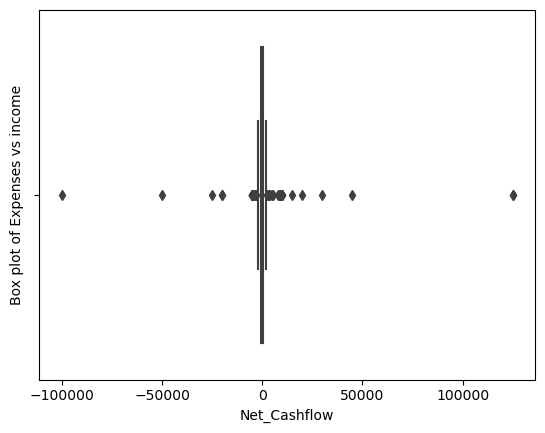

In [32]:
# expenses vs income 
sns.boxplot(x='Net_cashflow' , data=bank_statement_df)
plt.xlabel('Net_Cashflow')
plt.ylabel('Box plot of Expenses vs income')
plt.show()

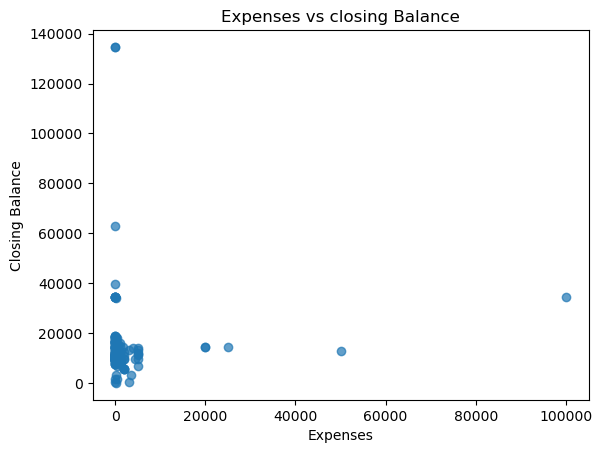

In [33]:
# Expenses vs closing balance scatter plot:
plt.scatter(bank_statement_df['Withdrwal Amount'],bank_statement_df['closing Balance'],alpha=0.7)
plt.xlabel('Expenses')
plt.ylabel('Closing Balance')
plt.title('Expenses vs closing Balance')
plt.show()

monthly_savings: Month
1.0     84724.49
2.0      8923.09
3.0    -12846.80
4.0      9381.00
5.0    -15178.00
6.0      5453.18
7.0    133248.00
dtype: float64


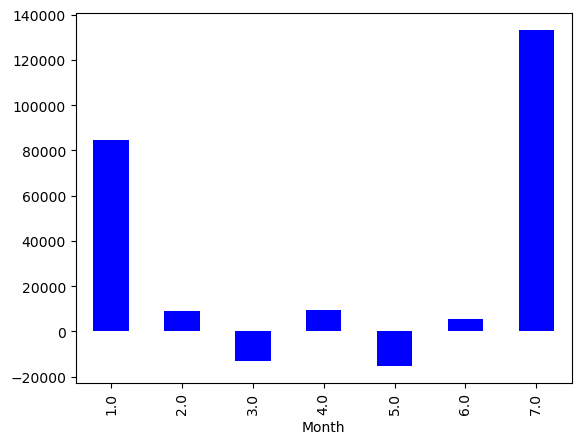

In [34]:
# monthly savings by substracting total expenses from total income

monthly_Savings = monthly_income - monthly_expenses
print('monthly_savings:' , monthly_Savings)
monthly_Savings.plot(kind='bar',color='blue')
plt.show()

In [35]:
#  Biggest income 

biggest_income_day = bank_statement_df.nlargest(1,'Deposit Amount')

print('biggest_income_day:')
biggest_income_day

biggest_income_day:


,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance,Month,Day_of_Week,Net_cashflow,Day_of_week,Day,Weekday_Type
14,15,2024-07-09,A661235,BY CASH,0.0,125000.0,134655.58,7.0,Tuesday,125000.0,Tuesday,9.0,Weekday


In [36]:
#  Biggest expense 

biggest_expense_day = bank_statement_df.nlargest(1,'Withdrwal Amount')

print('biggest_expense_day:')
biggest_expense_day

biggest_expense_day:


,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance,Month,Day_of_Week,Net_cashflow,Day_of_week,Day,Weekday_Type
22,23,2024-07-06,S79667058,UPIAW419114475476/DR/ Allianc/NA/a11iance.payu@h/,100000.0,0.0,34655.58,7.0,Saturday,-100000.0,Saturday,6.0,Weekend


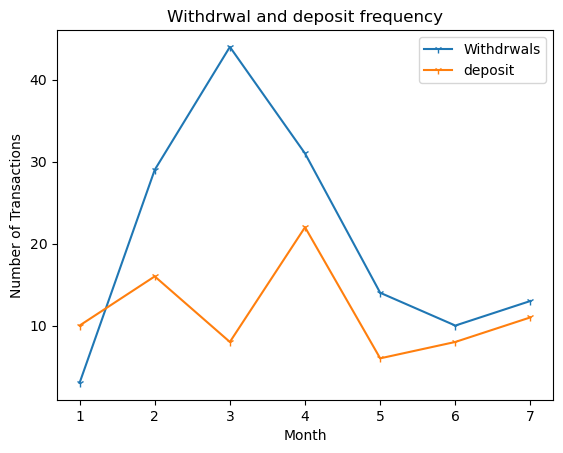

In [37]:
# withdrwal and deposit frqueancy over the months
withdrwal_frequency = bank_statement_df[bank_statement_df['Withdrwal Amount']>0].groupby('Month').size()
deposit_frequency = bank_statement_df[bank_statement_df['Deposit Amount']>0].groupby('Month').size()

withdrwal_frequency.plot(kind='line' ,label='Withdrwals',marker='1')
deposit_frequency.plot(kind='line',label='deposit',marker='1')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Withdrwal and deposit frequency')
plt.legend()
plt.show()

Daily Average Balance:
Month
1.0    14684.547778
2.0    26337.542857
3.0    26520.670000
4.0    29105.426087
5.0    24561.338462
6.0    13550.760000
7.0    91103.302500
dtype: float64


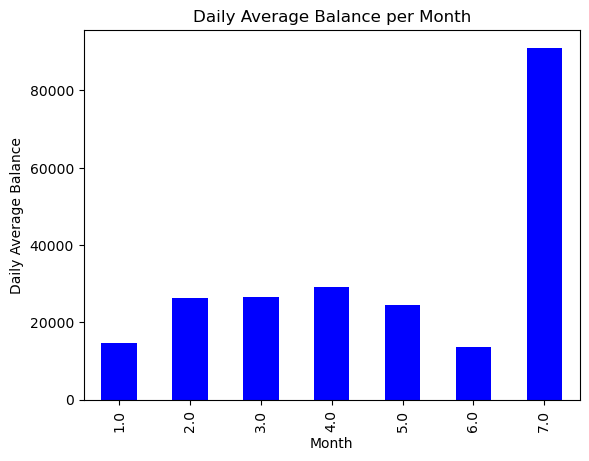

In [38]:
# Calculate daily average balance per month
daily_average_balance = bank_statement_df.groupby('Month')['closing Balance'].sum() / bank_statement_df.groupby('Month')['Day'].nunique()

print('Daily Average Balance:')
print(daily_average_balance)

# Plotting daily average balance as a bar plot
daily_average_balance.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Daily Average Balance')
plt.title('Daily Average Balance per Month')
plt.show()

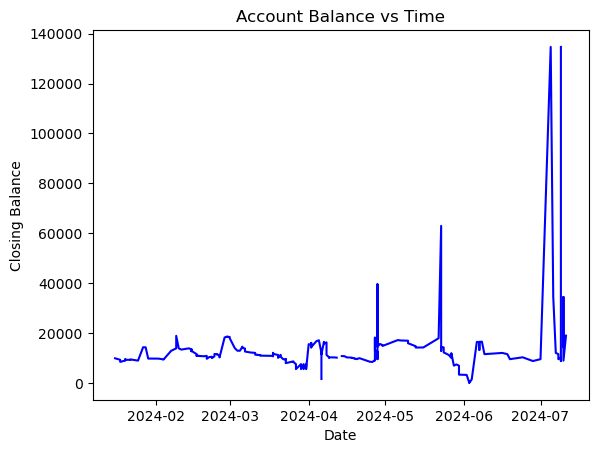

In [39]:
# balance vs time plot
# visulaize the chnage on your account over time 

plt.plot(bank_statement_df['Date'],bank_statement_df['closing Balance'],color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Balance')
plt.title('Account Balance vs Time')
plt.show()

In [40]:
# expense vs income ration 
expense_income_ratio = total_expenses/total_income
print("expenses_income_ratio:",expense_income_ratio)

expenses_income_ratio: 0.6051139093355188


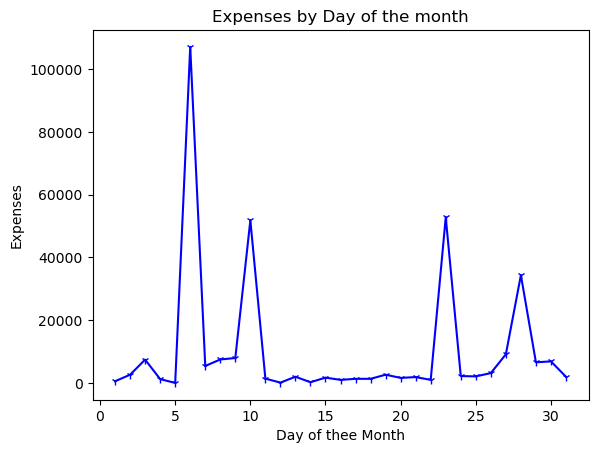

In [41]:
# Expense by day of the month
# analyze the expenses on different days of the month

expenses_by_month = bank_statement_df.groupby(bank_statement_df['Date'].dt.day)['Withdrwal Amount'].sum()
plt.plot(expenses_by_month.index,expenses_by_month,marker='1',color='blue')
plt.xlabel('Day of thee Month')
plt.ylabel('Expenses')
plt.title('Expenses by Day of the month')
plt.show()

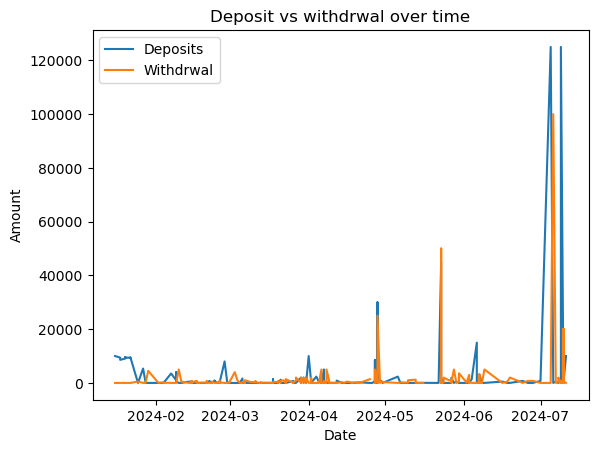

In [42]:
# Deposit and withdrwal trend over line
plt.plot(bank_statement_df['Date'],bank_statement_df['Deposit Amount'],label='Deposits')
plt.plot(bank_statement_df['Date'],bank_statement_df['Withdrwal Amount'],label='Withdrwal')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Deposit vs withdrwal over time')
plt.legend()
plt.show()

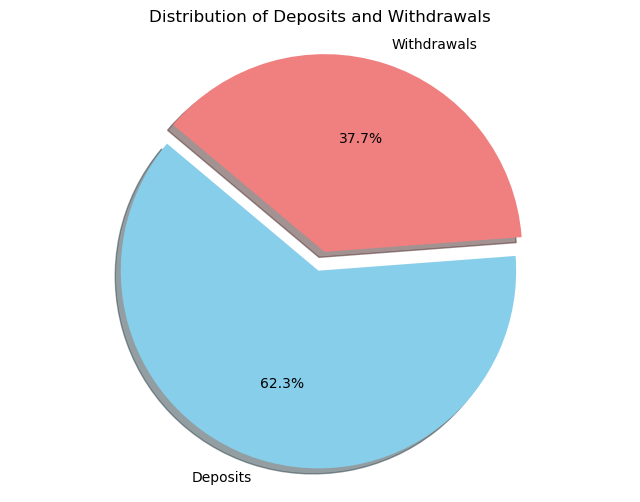

In [43]:
import matplotlib.pyplot as plt

# Aggregate total deposit and withdrawal amounts
total_deposits = bank_statement_df['Deposit Amount'].sum()
total_withdrawals = bank_statement_df['Withdrwal Amount'].sum()

# Pie chart data
labels = ['Deposits', 'Withdrawals']
sizes = [total_deposits, total_withdrawals]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # Explode the 'Withdrawals' slice

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Deposits and Withdrawals')
plt.show()


average_expense_per_transaction: Month
1.0    -386.153846
2.0    -284.111111
3.0    -470.515385
4.0   -1006.584906
5.0   -3325.400000
6.0    -866.473333
7.0   -6239.625000
Name: Transaction_amount, dtype: float64


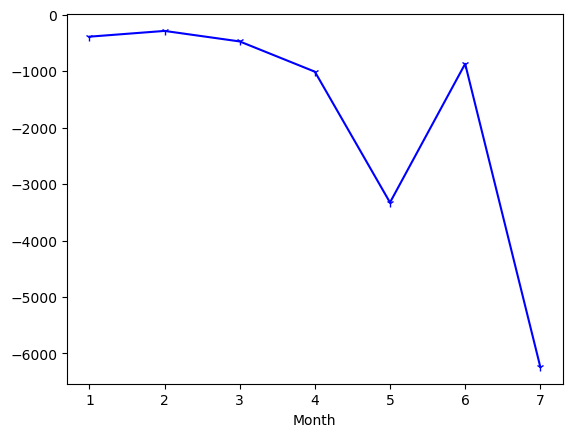

In [44]:
# average expense per transaction for each month
bank_statement_df['Transaction_amount']= bank_statement_df['Withdrwal Amount']* -1
average_expense_per_transaction = bank_statement_df.groupby('Month')['Transaction_amount'].mean()
print('average_expense_per_transaction:',average_expense_per_transaction)
average_expense_per_transaction.plot(kind='line',marker='1',color='blue')
plt.show()

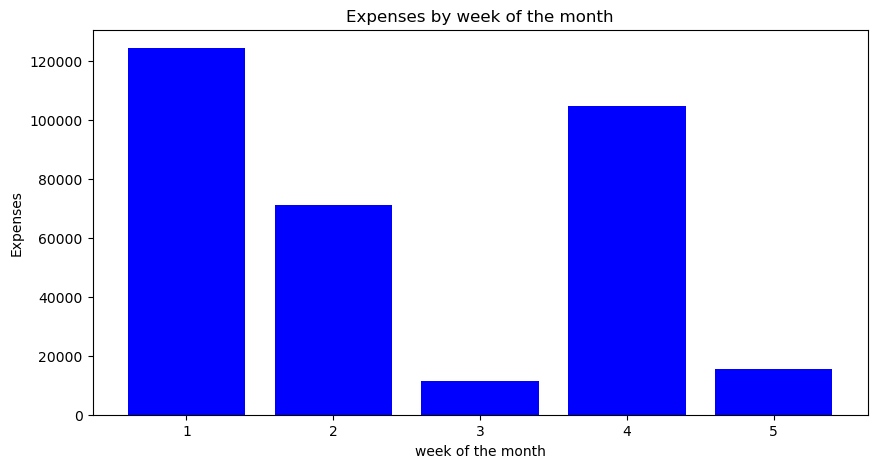

In [45]:
# Expense by week of month

week_of_month = bank_statement_df['Date'].apply(lambda x:(x.day-1)//7+1)
expenses_by_week_of_month = bank_statement_df.groupby(week_of_month)['Withdrwal Amount'].sum()

plt.figure(figsize=(10,5))
plt.bar(expenses_by_week_of_month.index ,  expenses_by_week_of_month , color='blue')
plt.xlabel('week of the month')
plt.ylabel('Expenses')
plt.title('Expenses by week of the month')
plt.show()

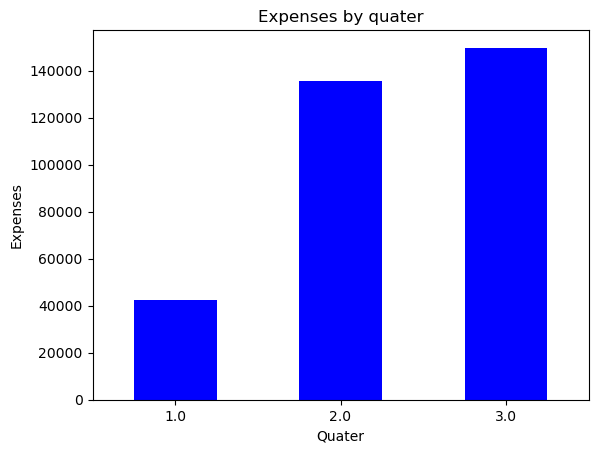

In [46]:
# Expenses by Quater

quaterly_expense = bank_statement_df.groupby(bank_statement_df['Date'].dt.quarter)['Withdrwal Amount'].sum()
quaterly_expense.plot(kind='bar',color='blue',rot=0)
plt.xlabel('Quater')
plt.ylabel('Expenses')
plt.title('Expenses by quater')
plt.show()

debt_to_income_ration: Month
1.0     3.648985
2.0    15.085451
3.0    28.182127
4.0     5.220410
5.0     6.379823
6.0    15.557292
7.0     1.157164
Name: Deposit Amount, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


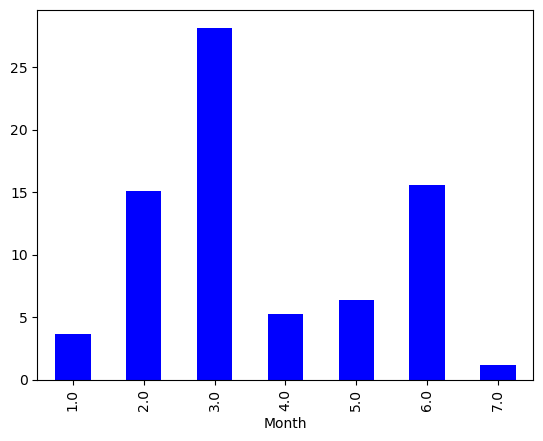

In [47]:
# debt to income ratio 

debt_to_income_ratio = total_expenses/monthly_income
print('debt_to_income_ration:',debt_to_income_ratio)
print(debt_to_income_ratio.plot(kind='bar',color='blue'))
plt.show()

Expenses_to_monthly_Ratio:
 Month
1.0     3.648985
2.0    15.085451
3.0    28.182127
4.0     5.220410
5.0     6.379823
6.0    15.557292
7.0     1.157164
Name: Deposit Amount, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


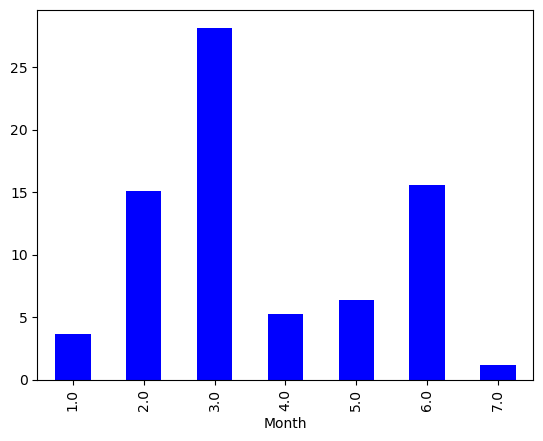

In [48]:
# Expenses to income ratio

Expenses_to_income_ratio = total_expenses/ monthly_income
print('Expenses_to_monthly_Ratio:\n',Expenses_to_income_ratio)

print(Expenses_to_income_ratio.plot(kind='bar', color='blue'))
plt.show()

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

bank_statement_df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
bank_statement_df.dropna(subset=['Withdrwal Amount', 'Deposit Amount'], inplace=True) 

# Standardizing features for clustering
features_for_clustering = bank_statement_df[['Withdrwal Amount', 'Deposit Amount']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
bank_statement_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [50]:
bank_statement_df.head()

,s.no,Date,Transaction Id,Remarks,Withdrwal Amount,Deposit Amount,closing Balance,Month,Day_of_Week,Net_cashflow,Day_of_week,Day,Weekday_Type,Transaction_amount,Cluster
0,1,2024-07-11,A49516,BY CASH,0.0,10000.0,19066.08,7.0,Thursday,10000.0,Thursday,11.0,Weekday,-0.0,0
1,2,2024-07-10,S36503509,UPIAR/419216112836/DR/Soni Jiy/NA/soni8373@pay...,500.0,0.0,9066.08,7.0,Wednesday,-500.0,Wednesday,10.0,Weekday,-500.0,0
2,3,2024-07-10,S32577276,UPIAR/419214093193/DR/Allianc/NA/alliance.payu@h/,5000.0,0.0,9566.08,7.0,Wednesday,-5000.0,Wednesday,10.0,Weekday,-5000.0,0
3,4,2024-07-10,S31553714,UPIAR/419214269027/DR/ Allianc/NA/alliance.pay...,20000.0,0.0,14566.08,7.0,Wednesday,-20000.0,Wednesday,10.0,Weekday,-20000.0,0
4,5,2024-07-10,S31389355,UPIAR/419214181305/DR/Soni Jiy/NA/soni8373@pay...,1.0,0.0,34566.08,7.0,Wednesday,-1.0,Wednesday,10.0,Weekday,-1.0,0
